In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
def read_car_data():
    data = pd.read_csv('Indo_car_dataset1.csv', delimiter=';')
    return data

In [3]:
data = read_car_data()
data.head()

,ENGINE SIZE (L),CYLINDERS,COMB (L/100 km),CO2 EMISSIONS
0,2.0,4,18.3,318
1,2.0,4,18.5,321
2,2.5,4,18.7,324
3,2.5,4,18.8,327
4,2.0,4,17.6,305


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ENGINE SIZE (L)  380 non-null    float64
 1   CYLINDERS        380 non-null    int64  
 2   COMB (L/100 km)  380 non-null    float64
 3   CO2 EMISSIONS    380 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.0 KB


In [5]:
data.describe()

,ENGINE SIZE (L),CYLINDERS,COMB (L/100 km),CO2 EMISSIONS
count,380.000000,380.000000,380.000000,380.000000
mean,1.692632,3.960526,9.311500,218.968421
std,0.530493,0.424848,3.763543,71.563054
min,1.000000,3.000000,4.300000,88.000000
25%,1.300000,4.000000,6.975000,160.750000
50%,1.500000,4.000000,8.000000,222.500000
75%,2.000000,4.000000,10.200000,276.000000
max,3.500000,6.000000,18.800000,380.000000


In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


# Load your dataset into a DataFrame (replace 'your_dataset.csv' with the actual file path)
Indo_car_dataset = pd.read_csv('Indo_car_dataset1.csv', delimiter=';')

# Select columns for normalization
columns_to_normalize = ['ENGINE SIZE (L)', 'CYLINDERS', 'COMB (L/100 km)', 'CO2 EMISSIONS']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected columns
Indo_car_dataset[columns_to_normalize] = scaler.fit_transform(Indo_car_dataset[columns_to_normalize])

# Display the normalized DataFrame
print("Normalized DataFrame:")
print(Indo_car_dataset)

# Save the normalized data to a new CSV file (replace 'normalized_dataset.csv' with your desired file name)
normalized_file_path = 'normalized_dataset.csv'
Indo_car_dataset.to_csv(normalized_file_path, index=False)

print(f"\nNormalized data saved to {normalized_file_path}")

Normalized DataFrame:
     ENGINE SIZE (L)  CYLINDERS  COMB (L/100 km)  CO2 EMISSIONS
0                0.4   0.333333         0.965517       0.787671
1                0.4   0.333333         0.979310       0.797945
2                0.6   0.333333         0.993103       0.808219
3                0.6   0.333333         1.000000       0.818493
4                0.4   0.333333         0.917241       0.743151
..               ...        ...              ...            ...
375              0.2   0.333333         0.193103       0.116438
376              0.2   0.333333         0.200000       0.136986
377              0.2   0.333333         0.193103       0.116438
378              0.2   0.333333         0.200000       0.136986
379              0.2   0.333333         0.193103       0.116438

[380 rows x 4 columns]

Normalized data saved to normalized_dataset.csv


In [7]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load preprocessed data
data = pd.read_csv("normalized_dataset.csv")

# Separate features and target
features = data.drop("CO2 EMISSIONS", axis=1)
target = data["CO2 EMISSIONS"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss="mse",
    optimizer="adam",
    metrics=["mae", "mse"],
)

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")

# Save the model
model.save("co2_emission_predictor.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - loss: 0.2635 - mae: 0.4363 - mse: 0.2635 - val_loss: 0.1069 - val_mae: 0.2813 - val_mse: 0.1069
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0750 - mae: 0.2211 - mse: 0.0750 - val_loss: 0.0431 - val_mae: 0.1652 - val_mse: 0.0431
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0514 - mae: 0.1902 - mse: 0.0514 - val_loss: 0.0426 - val_mae: 0.1681 - val_mse: 0.0426
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0454 - mae: 0.1723 - mse: 0.0454 - val_loss: 0.0432 - val_mae: 0.1594 - val_mse: 0.0432
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0414 - mae: 0.1563 - mse: 0.0414 - val_loss: 0.0422 - val_mae: 0.1559 - val_mse: 0.0422
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0371 - mae: 0.1463 - mse: 0.0371 - val_loss: 0.0411 - val_mae: 0.1585 - val_mse: 0.0411
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0372 - mae: 0.1581 - mse: 0.0372 - val_loss

Test Loss: 0.0338
Test MAE: 0.1245
Test MSE: 0.0338


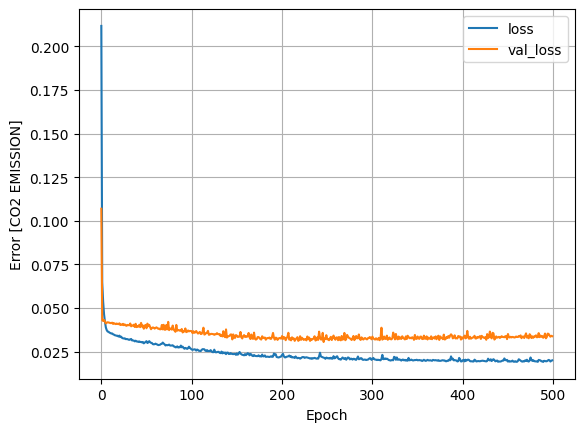

In [8]:
import matplotlib.pyplot as plt
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [CO2 EMISSION]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

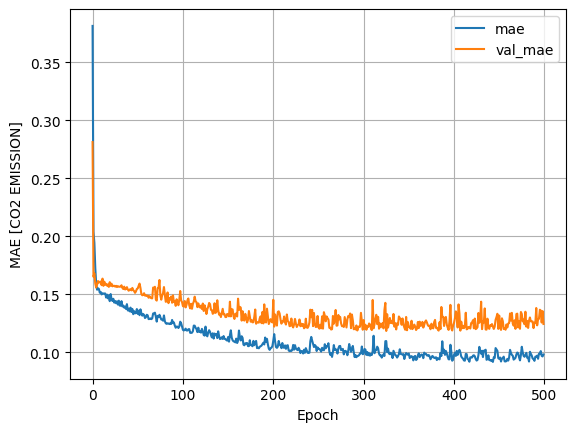

In [9]:
import matplotlib.pyplot as plt
def plot_mae(history):
  plt.plot(history.history['mae'], label='mae')
  plt.plot(history.history['val_mae'], label='val_mae')
  plt.xlabel('Epoch')
  plt.ylabel('MAE [CO2 EMISSION]')
  plt.legend()
  plt.grid(True)

plot_mae(history)

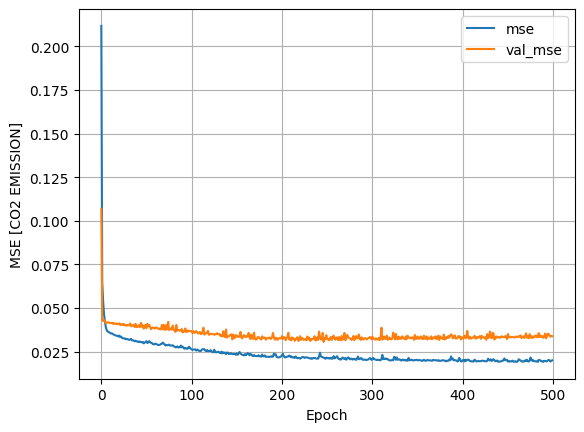

In [10]:
import matplotlib.pyplot as plt
def plot_mse(history):
  plt.plot(history.history['mse'], label='mse')
  plt.plot(history.history['val_mse'], label='val_mse')
  plt.xlabel('Epoch')
  plt.ylabel('MSE [CO2 EMISSION]')
  plt.legend()
  plt.grid(True)

plot_mse(history)

In [11]:
import tensorflow as tf
# Ensure that 'mse' is not defined as a custom function or variable in your environment
# Check for any variables named 'mse' and rename them if necessary

# Load the saved model
model = tf.keras.models.load_model("co2_emission_predictor.h5", compile=False)

# Compile the model after loading
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open("co2_emission_predictor.tflite", "wb") as f:
    f.write(tflite_model)

print("Model converted to TFLite successfully!")

Saved artifact at '/tmp/tmpjevext4b'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137363791447840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137363791452064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137363791459280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137363226363856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137363226367904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137363226368784: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model converted to TFLite successfully!


In [12]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

data = pd.read_csv("normalized_dataset.csv")

features = data.drop("CO2 EMISSIONS", axis=1)
target = data["CO2 EMISSIONS"]

X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Load the model using compile=False to avoid loading the loss function immediately
model = tf.keras.models.load_model("co2_emission_predictor.h5", compile=False)

# Compile the model after loading, ensuring that 'mse' is correctly recognized as the loss function
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

loss, mae, mse = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation MAE: {mae:.4f}")
print(f"Validation MSE: {mse:.4f}")

predictions = model.predict(X_val)

# Print some predicted values
for i in range(10):
    print(f"Actual: {y_val.iloc[i]}, Predicted: {predictions[i][0]:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step - loss: 0.0198 - mae: 0.0960 - mse: 0.0198
Validation Loss: 0.0212
Validation MAE: 0.0982
Validation MSE: 0.0212
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Actual: 0.5410958904109588, Predicted: 0.2558
Actual: 0.7054794520547946, Predicted: 0.7249
Actual: 0.4178082191780822, Predicted: 0.3975
Actual: 0.5136986301369862, Predicted: 0.4859
Actual: 0.4623287671232876, Predicted: 0.4965
Actual: 0.1506849315068493, Predicted: 0.2256
Actual: 0.5, Predicted: 0.3010
Actual: 0.7945205479452054, Predicted: 0.7532
Actual: 0.6815068493150684, Predicted: 0.6940
Actual: 0.9178082191780822, Predicted: 0.6588
